#LIBRERIAS A USAR

In [50]:
# Importamos bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error, silhouette_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

#CARGAR DATOS

In [6]:
cvs = pd.read_csv('/content/titanic3.csv', sep=';', on_bad_lines='skip')
cvs.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
cvs.shape

(1310, 14)

In [8]:
cvs.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [9]:
cvs.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [10]:
cvs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


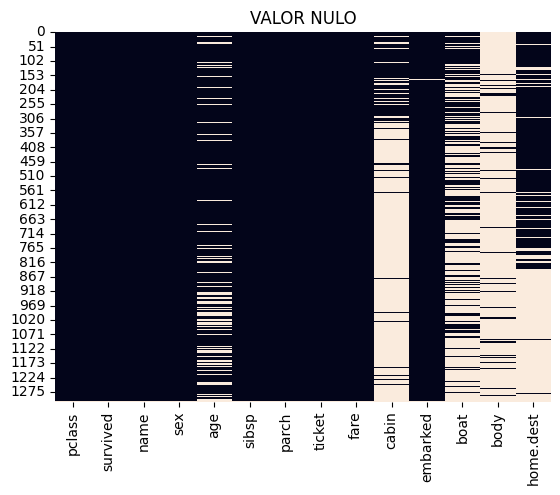

In [11]:
sns.heatmap(cvs.isnull() , cbar = False)
plt.title('VALOR NULO')
plt.show()

#SELECCIONAMOS COLUMNAS RELEVANTES PARA EL ANALISIS

In [12]:
selected_columns = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'survived']
cvs = cvs[selected_columns]

# Usamos imputación para columnas con valores faltantes.

In [13]:
imputer = SimpleImputer(strategy='mean')  # Rellenar valores numéricos con la media
cvs['age'] = imputer.fit_transform(cvs[['age']])
cvs['fare'] = imputer.fit_transform(cvs[['fare']])
cvs['embarked'].fillna(cvs['embarked'].mode()[0], inplace=True)

<ipython-input-13-ef8a7fa88450>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cvs['embarked'].fillna(cvs['embarked'].mode()[0], inplace=True)


# Convertimos 'sex' y 'embarked' en valores numéricos.

In [18]:
X = cvs.drop(columns=['survived'])
y = cvs['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
label_encoder = LabelEncoder()
cvs['sex'] = label_encoder.fit_transform(cvs['sex'])
cvs['embarked'] = label_encoder.fit_transform(cvs['embarked'])

In [27]:
cvs = cvs.dropna(subset=['survived'])

In [28]:
X = cvs.drop(columns=['survived'])  # Eliminar la columna objetivo
y = cvs['survived']  # Variable objetivo

In [29]:
# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalización de datos

In [30]:
#N ormalización de datos (asegurarse de que X_train/X_test contengan valores numéricos)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Clasificación - Predicción de Supervivencia
# Usaremos RandomForestClassifier para clasificación.

In [31]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred_class = classifier.predict(X_test)

# Evaluamos del modelo de clasificación

In [32]:
accuracy = accuracy_score(y_test, y_pred_class)
print("\nAccuracy del modelo de clasificación:", accuracy)
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_class))


Accuracy del modelo de clasificación: 0.7900763358778626

Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       144
         1.0       0.82      0.69      0.75       118

    accuracy                           0.79       262
   macro avg       0.80      0.78      0.78       262
weighted avg       0.79      0.79      0.79       262



In [33]:
X_reg = cvs.drop(columns=['fare'])
y_reg = cvs['fare']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)


In [34]:
regressor = GradientBoostingRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)
y_pred_reg = regressor.predict(X_test_reg)

In [35]:
# Evaluación del modelo de regresión
mse = mean_squared_error(y_test_reg, y_pred_reg)
print("\nMSE del modelo de regresión:", mse)


MSE del modelo de regresión: 1301.7400167365815


In [36]:
# 10. Clustering - Agrupamiento de pasajeros
# Usaremos KMeans para clusterización.
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

In [37]:
# Evaluación de la calidad del clustering
silhouette_avg = silhouette_score(X, clusters)
print("\nSilhouette Score del modelo de clustering:", silhouette_avg)


Silhouette Score del modelo de clustering: 0.791482601311233


In [38]:
# Agregar los clusters al dataset
cvs['cluster'] = clusters

# VISUALIZACION DE RESULTADOS
# Clasificación - Importancia de características

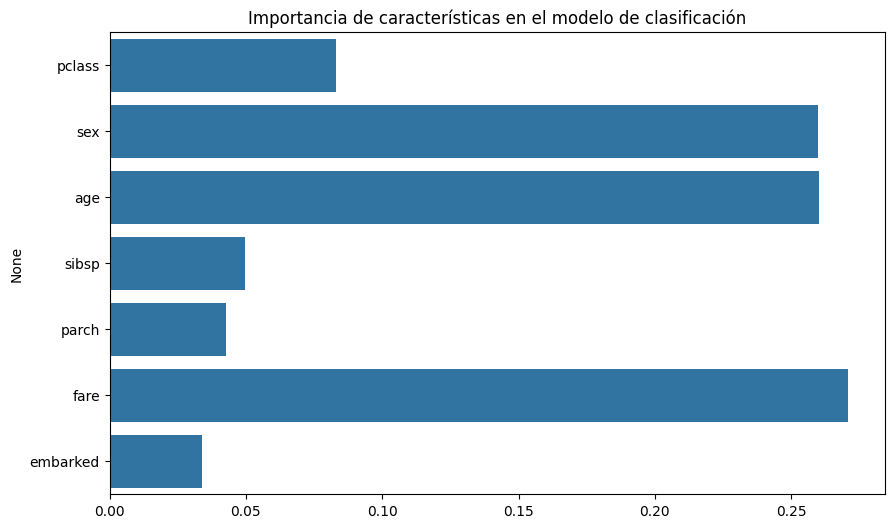

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=classifier.feature_importances_, y=X.columns)
plt.title("Importancia de características en el modelo de clasificación")
plt.show()

In [41]:
X_array = X.values  # Extraer los valores numéricos del DataFrame X

In [47]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

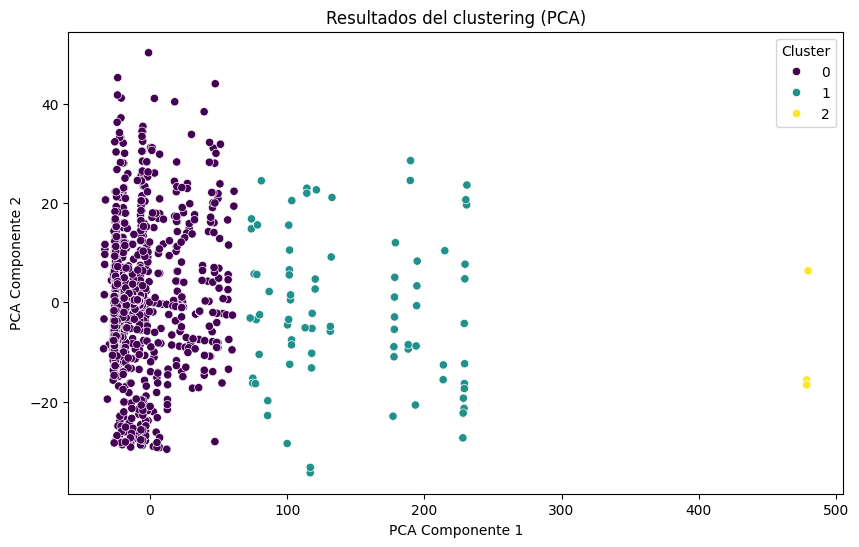

In [48]:
# Clustering - Visualización en 2D (reducción PCA opcional para más dimensiones)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title("Resultados del clustering (PCA)")
plt.xlabel("PCA Componente 1")
plt.ylabel("PCA Componente 2")
plt.legend(title="Cluster")
plt.show()

In [52]:
!pip install PyGithub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.9/375.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 22.6 MB/s eta 0:00:00


In [53]:
from github import Github

In [57]:
g = Github("YOUR_GITHUB_TOKEN")

In [59]:
repo = g.get_user("elvisaldana").get_repo("MLII_V1")

In [ ]:
with open("/content/tu_archivo.ipynb", "r") as file:
    content = file.read()
repo.create_file("tu_archivo.ipynb", "Añadido desde Google Colab", content)
print("Archivo subido exitosamente.")